In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 30.52 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [ ]:
%cd pytorch-CycleGAN-and-pix2pix/
!pwd

/content/pytorch-CycleGAN-and-pix2pix
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!pip install -r requirements.txt

# LABEL TO PHOTO

In [ ]:
model_name = 'facades_label2photo'

In [ ]:
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
model_directory

'./checkpoints/facades_label2photo_pretrained/'

In [ ]:
!mkdir -p {model_directory}

In [ ]:
model_url = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
model_url

'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth'

In [ ]:
!wget -N {model_url}

--2024-02-12 09:16:26--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘facades_label2photo.pth’

facades_label2photo 100%[===================>] 207.62M  38.8MB/s    in 5.9s    

2024-02-12 09:16:33 (35.5 MB/s) - ‘facades_label2photo.pth’ saved [217704720/217704720]



In [ ]:
!mv {model_name}.pth {model_directory}/latest_net_G.pth

In [ ]:
dataset = 'facades'
dataset_file = '{}.tar.gz'.format(dataset)
dataset_url = "http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{}".format(dataset_file)
dataset_url

'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz'

In [ ]:
!wget -N {dataset_url}

--2024-02-12 09:16:33--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M  1.48MB/s    in 19s     

2024-02-12 09:16:52 (1.50 MB/s) - ‘facades.tar.gz’ saved [30168306/30168306]



In [ ]:
!tar -zxvf {dataset_file} -C ./datasets/

In [ ]:
model_name

'facades_label2photo'

In [ ]:
!python test.py --dataroot ./datasets/{dataset} --direction BtoA --model pix2pix --name {model_name}_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [ ]:
results_directory = './results/{}_pretrained/test_latest/images/'.format(model_name)

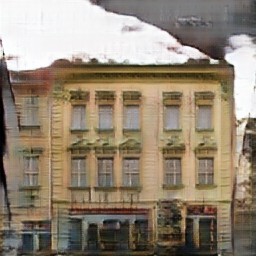

In [ ]:
result_img = cv2.imread(results_directory + '101_fake_B.png')
cv2_imshow(result_img)

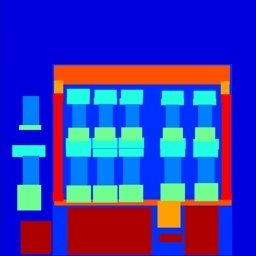

In [ ]:
result_img = cv2.imread(results_directory + '101_real_A.png')
cv2_imshow(result_img)

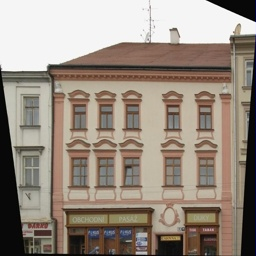

In [ ]:
result_img = cv2.imread(results_directory + '101_real_B.png')
cv2_imshow(result_img)

# DRAWING PHOTO - EDGES TO SHOES

In [ ]:
model_name = 'edges2shoes'
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
!mkdir -p {model_directory}

In [ ]:
model_url = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
!wget -N {model_url}
!mv {model_name}.pth {model_directory}/latest_net_G.pth

--2024-02-12 09:17:09--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘edges2shoes.pth’

edges2shoes.pth     100%[===================>] 207.62M  38.6MB/s    in 10s     

2024-02-12 09:17:19 (20.9 MB/s) - ‘edges2shoes.pth’ saved [217704688/217704688]



In [ ]:
dataset = 'edges2shoes'
dataset_file = '{}.tar.gz'.format(dataset)
dataset_url = "http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{}".format(dataset_file)
!wget -N {dataset_url}
!tar -zxvf {dataset_file} -C ./datasets/

Parameters:

* ` --dataset_mode single` - sets the mode to `single` which means we will send single images

* `--model test` - to send test images

* `--netG unet_256` - the neural network of the generator

* `--norm batch` - this is the default value

* `--direction` - not needed since it is a single image

> NOTE: TEST DATASET SHOULD BE INCLUDE JUST INPUT NOT EXPECTED/GROUND TRUTH IMAGE PART

In [ ]:
!python test.py --dataroot ./datasets/{dataset} --direction BtoA --model pix2pix --name {model_name}_pretrained  --netG unet_256

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2shoes        	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [ ]:
results_directory = './results/{}_pretrained/test_latest/images/'.format(model_name)

In [ ]:
results_directory

'./results/edges2shoes_pretrained/test_latest/images/'

In [ ]:
def show_results(img_name, directory):
  input_img = cv2.imread(directory + img_name + '_real_B.png')
  result_img = cv2.imread(directory + img_name + '_fake_B.png')
  imgs = [input_img, result_img]
  title = ['Input image', 'Photo (output)']
  for i in range(len(imgs)):
    plt.subplot(1,2,i + 1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
imgs_dir = '/content/pytorch-CycleGAN-and-pix2pix/datasets/edges2shoes/test'
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(imgs_dir) if f.endswith(".jpg")]
list_imgs

['56_AB',
 '67_AB',
 '100_AB',
 '76_AB',
 '43_AB',
 '156_AB',
 '132_AB',
 '91_AB',
 '29_AB',
 '108_AB',
 '34_AB',
 '178_AB',
 '83_AB']


Result for image 56_AB


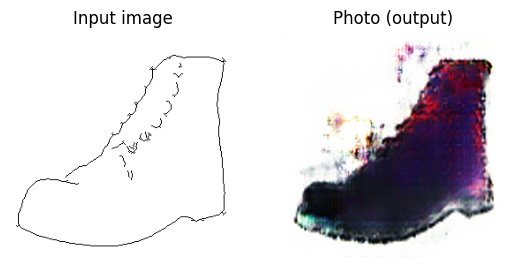


Result for image 67_AB


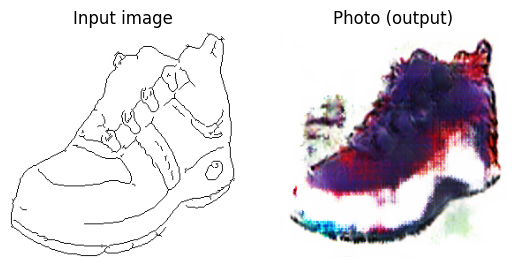


Result for image 100_AB


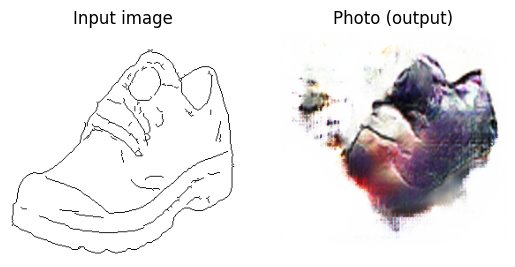


Result for image 76_AB


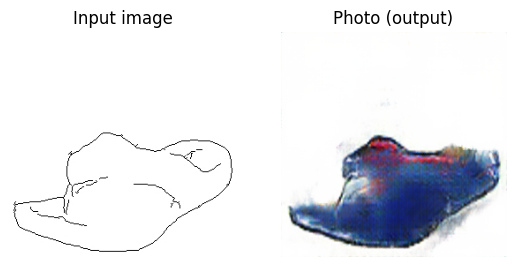


Result for image 43_AB


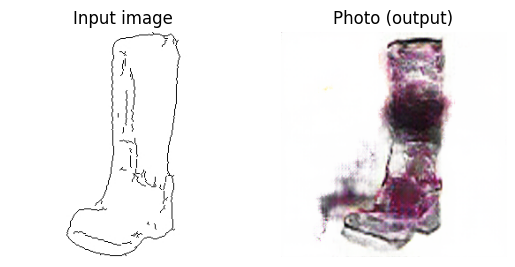


Result for image 156_AB


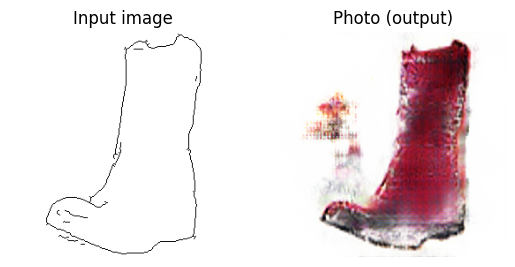


Result for image 132_AB


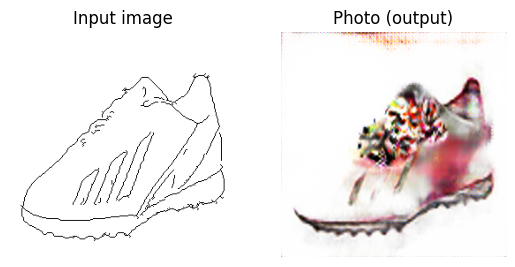


Result for image 91_AB


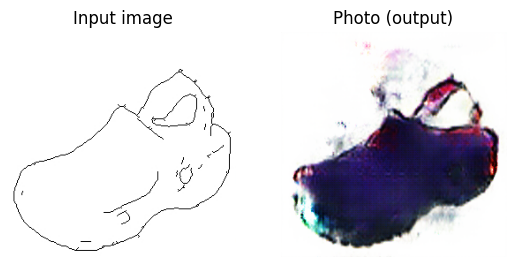


Result for image 29_AB


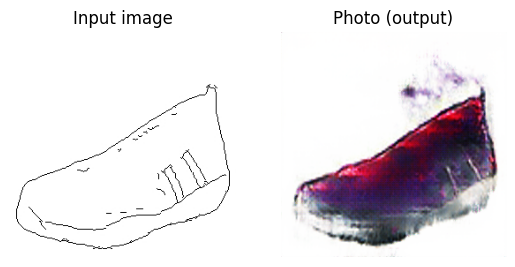


Result for image 108_AB


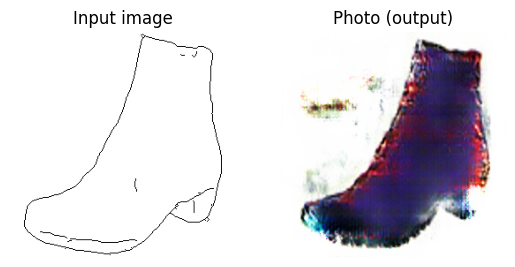


Result for image 34_AB


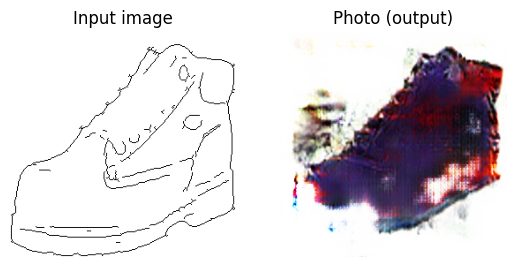


Result for image 178_AB


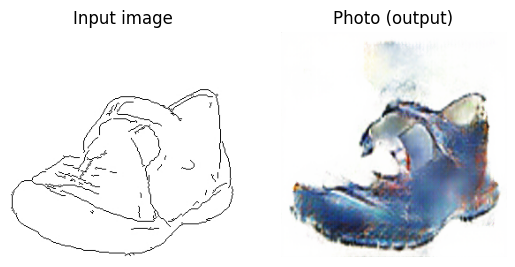


Result for image 83_AB


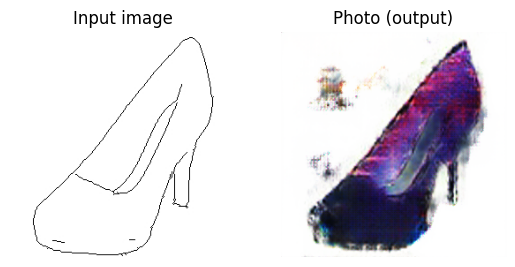

In [ ]:
for img in list_imgs:
  print('\nResult for image {}'.format(img))
  show_results(img, results_directory)

Single Prediction

In [ ]:
!python test.py --dataroot /content/shoes_images --name {model_name}_pretrained --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/shoes_images         	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# DAY TO NIGHT

In [ ]:
model_name = 'day2night'
model_directory = './checkpoints/{}_pretrained/'.format(model_name)
!mkdir -p {model_directory}

In [ ]:
url_model = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(model_name)
!wget -N {url_model}

--2024-02-12 10:08:24--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘day2night.pth’

day2night.pth       100%[===================>] 207.62M  35.7MB/s    in 10s     

2024-02-12 10:08:35 (19.9 MB/s) - ‘day2night.pth’ saved [217710797/217710797]



In [ ]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

In [ ]:
model_name

'day2night'

In [ ]:
dataset = 'night2day'
dataset_file = '{}.tar.gz'.format(dataset)
dataset_url = "http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{}".format(dataset_file)
!wget -N {dataset_url}
!tar -zxvf {dataset_file} -C ./datasets/

In [ ]:
!python test.py --dataroot /content/night2day_images --name {model_name}_pretrained --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/night2day_images     	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            